In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Visualización gráfica
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import style

# Método de Newton-Raphson y Suposición Inteligente
# ==============================================================================
from utilities.find_roots import find_roots
from utilities.newton_raphson import newton_raphson

# Modelos de correlación del Factor Z
# ==============================================================================
from models.explicit_zmodel.Beggs_Brill import zmodel_BB
from models.explicit_zmodel.Papp import zmodel_PAP
from models.explicit_zmodel.Kareem_Iwalewa_AlMarhoun import zmodel_KIM
from models.explicit_zmodel.Kamyab_Sampaio_Qanbari_Eustes import zmodel_KSQE
from models.implicit_zmodel.Hall_Yarborough import zmodel_HY
from models.implicit_zmodel.Dranchuk_Purvis_Robinson import zmodel_DPR
from models.implicit_zmodel.Dranchuk_AbouKassem import zmodel_DAK
from models.implicit_zmodel.Londono_Archer_Blasingame import zmodel_LAB


# Configuración de Matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración de advertencias
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# **Z-Factor Correlation (Explicit Models)**

In [2]:
help(zmodel_KIM) # zmodel_KIM

Help on function zmodel_KIM in module models.explicit_zmodel.Kareem_Iwalewa_AlMarhoun:

zmodel_KIM(Pr=None, Tr=None)
    Calculate the compressibility factor (Z) using Kareem, Iwalewa and Al-Marhoun's 
    correlation (KIM, 2016).
    
    DOI: https://doi.org/10.1007/s13202-015-0209-3
    
    This function computes the compressibility factor using the KIM correlation
    based on the given pseudo-reduced pressure (Pr) and pseudo-reduced temperature (Tr).
    
    Since the KIM correlation is explicit, it requires only one iteration for convergence.
    
    Parameters:
        Pr (float): Pseudo-reduced pressure (dimensionless).
        Tr (float): Pseudo-reduced temperature (dimensionless).
    
    Returns:
        float: Calculated compressibility factor (Z) (dimensionless).



In [3]:
# Definir los valores de Pr y Tr
Pr_val, Tr_val = 3.0153, 1.6155

# Calcular el valor utilizando la función zmodel_kareem
z_val = zmodel_KIM(Pr=Pr_val, Tr=Tr_val)

# Imprimir el resultado
print(f"The compressibility factor using the Kareem, Iwalewa and Al-Marhoun's correlation:")
print(f"For Pr = {Pr_val} and Tr = {Tr_val}, the 'z' value is: {z_val}")

The compressibility factor using the Kareem, Iwalewa and Al-Marhoun's correlation:
For Pr = 3.0153 and Tr = 1.6155, the 'z' value is: 0.8255204644828578


## *Beggs and Brill's correlation (1973)*

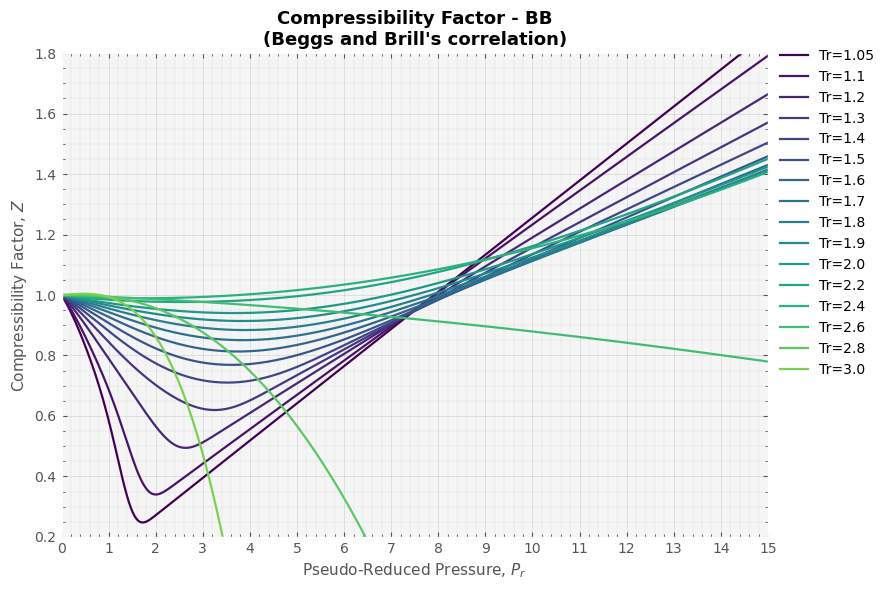

In [7]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Factor Z para cada valor de Tr_val
Zs_by_Tr = {}

# Calcular los valores de Z y almacenarlos en el diccionario
for Tr in Tr_val:
    Zs_by_Tr[Tr] = [zmodel_BB(Pr=Pr, Tr=Tr) for Pr in Pr_val]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de Kareem
for i, (Tr, Zs) in enumerate(Zs_by_Tr.items()):
    plt.plot(Pr_val, Zs, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - BB\n(Beggs and Brill's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Papp's correlation (1979)*

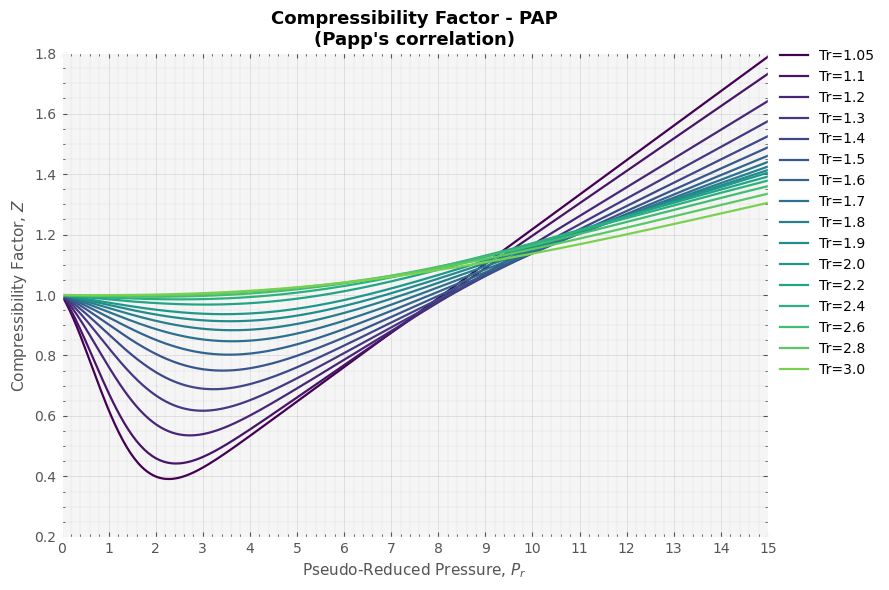

In [6]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Factor Z para cada valor de Tr_val
Zs_by_Tr = {}

# Calcular los valores de Z y almacenarlos en el diccionario
for Tr in Tr_val:
    Zs_by_Tr[Tr] = [zmodel_PAP(Pr=Pr, Tr=Tr) for Pr in Pr_val]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de Kareem
for i, (Tr, Zs) in enumerate(Zs_by_Tr.items()):
    plt.plot(Pr_val, Zs, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - PAP\n(Papp's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Kamyab, Sampaio, Qanbari and Eustes (2010)*

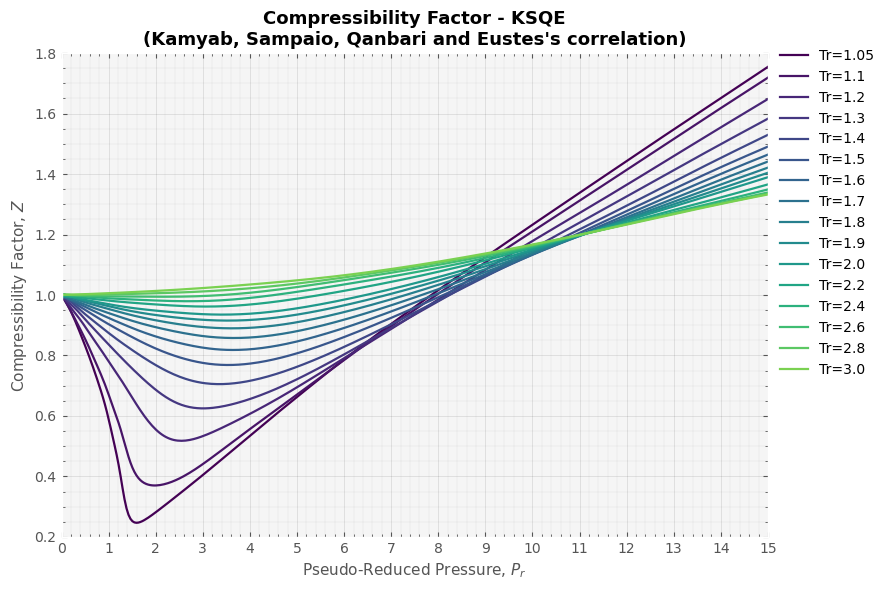

In [13]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Factor Z para cada valor de Tr_val
Zs_by_Tr = {}

# Calcular los valores de Z y almacenarlos en el diccionario
for Tr in Tr_val:
    Zs_by_Tr[Tr] = [zmodel_KSQE(Pr=Pr, Tr=Tr) for Pr in Pr_val]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de Kareem
for i, (Tr, Zs) in enumerate(Zs_by_Tr.items()):
    plt.plot(Pr_val, Zs, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - KSQE\n(Kamyab, Sampaio, Qanbari and Eustes's correlation)", 
             fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Kareem, Iwalewa and Al-Marhoun (2016)*

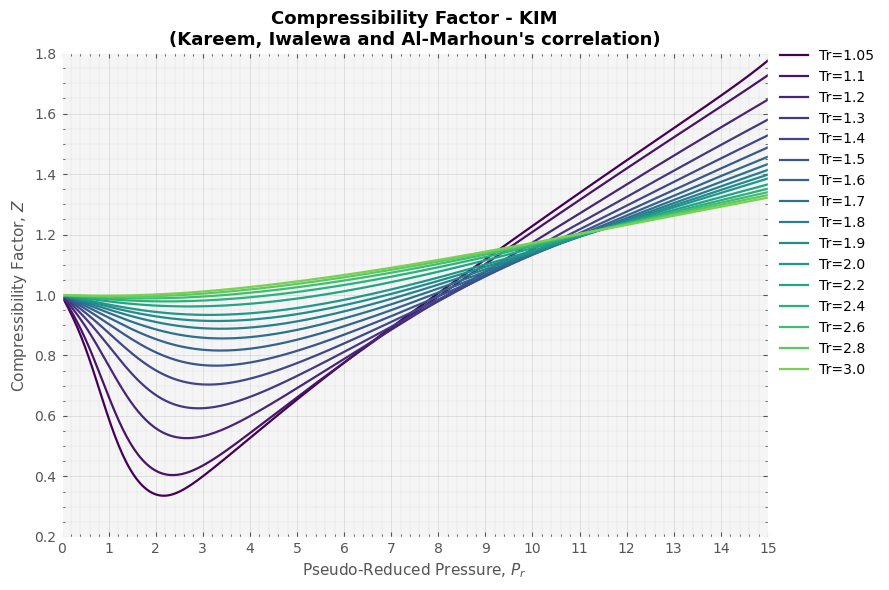

In [14]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Factor Z para cada valor de Tr_val
Zs_by_Tr = {}

# Calcular los valores de Z y almacenarlos en el diccionario
for Tr in Tr_val:
    Zs_by_Tr[Tr] = [zmodel_KIM(Pr=Pr, Tr=Tr) for Pr in Pr_val]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de Kareem
for i, (Tr, Zs) in enumerate(Zs_by_Tr.items()):
    plt.plot(Pr_val, Zs, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - KIM\n(Kareem, Iwalewa and Al-Marhoun's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# **Z-Factor Correlation (Implicit Models)**

In [2]:
help(zmodel_DAK) # zmodel_DAK, zmodel_DPR, zmodel_LAB, zmodel_HY 

Help on function zmodel_DAK in module models.implicit_zmodel.Dranchuk_AbouKassem:

zmodel_DAK(z=None, Pr=None, Tr=None)
    Calculate the result of Dranchuk and Abou-Kassem's correlation (DAK, 1975).
    
    This function computes the compressibility factor using the DAK correlation
    based on the given pseudo-reduced pressure (Pr) and pseudo-reduced temperature (Tr). 
    
    Since the DAK correlation is implicit, numerical methods like root-finding 
    algorithms are needed to solve it.
    
    Parameters:
        z (float): Value of z parameter (dimensionless).
        Pr (float): Pseudo-reduced pressure (dimensionless).
        Tr (float): Pseudo-reduced temperature (dimensionless).
    
    Returns:
        float: Result of the DAK equation (dimensionless).



In [17]:
# Definir los valores de Pr y Tr
Pr_val, Tr_val = 3.0153, 1.6155

# Encontrar la raíz de DAK(z, Pr, Tr) = 0 usando el Método de Newton-Raphson
z_initial_guess = 0.3
z_val = newton_raphson(zmodel_DAK, z_initial_guess, Pr_val, Tr_val)

# Imprimir el resultado
print(f"The compressibility factor using the DAK's correlation:")
print(f"For Pr = {Pr_val} and Tr = {Tr_val}, the 'z' value is: {z_val}")

The compressibility factor using the DAK's correlation:
For Pr = 3.0153 and Tr = 1.6155, the 'z' value is: 0.8332492086623111


## *Hall and Yarborough (1973)*

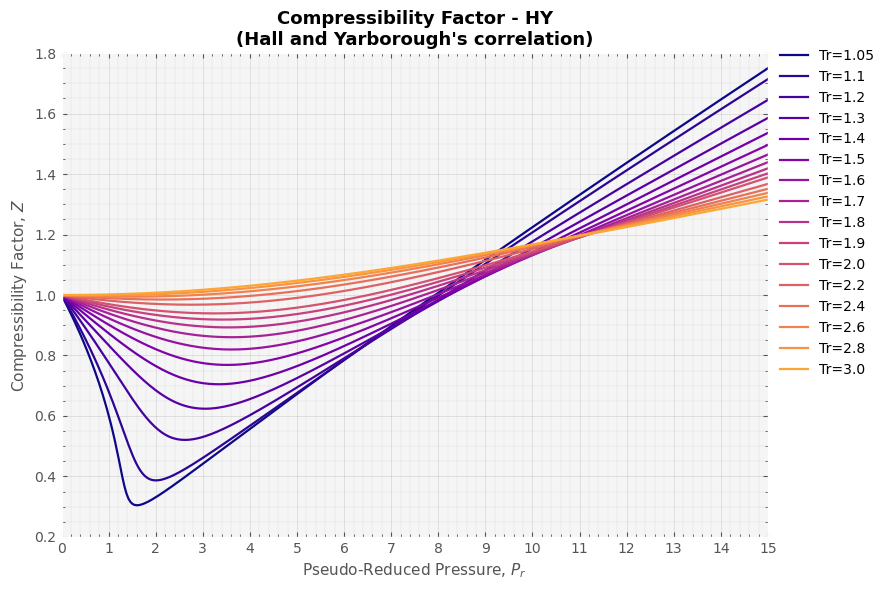

In [3]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Encontrar raíces para cada valor de Tr_val
roots_by_Tr = find_roots(Tr_val, Pr_val, zmodel_HY)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.plasma(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de DAK
for i, (Tr, roots) in enumerate(roots_by_Tr.items()):
    ax.plot(Pr_val, roots, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

# Ajuste de los ticks
ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - HY\n(Hall and Yarborough's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Dranchuk, Purvis and Robinson (1974)*

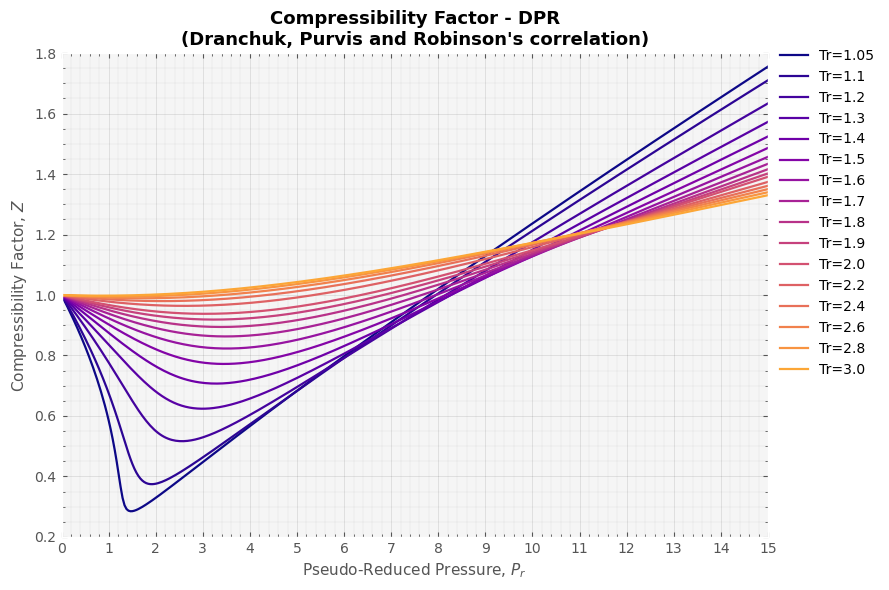

In [19]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Encontrar raíces para cada valor de Tr_val
roots_by_Tr = find_roots(Tr_val, Pr_val, zmodel_DPR)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.plasma(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de DAK
for i, (Tr, roots) in enumerate(roots_by_Tr.items()):
    ax.plot(Pr_val, roots, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

# Ajuste de los ticks
ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - DPR\n(Dranchuk, Purvis and Robinson's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Dranchuk and Abou-Kassem (1975)*

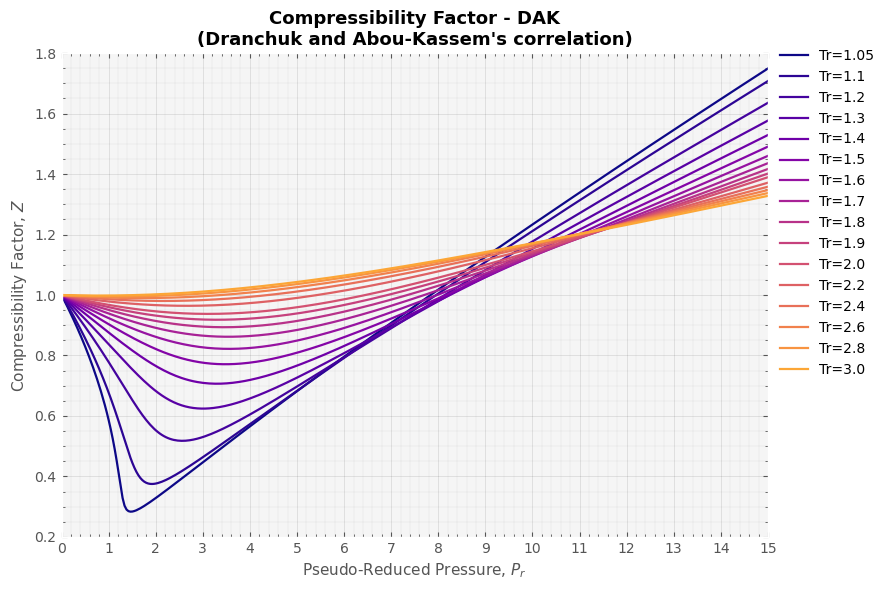

In [20]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Encontrar raíces para cada valor de Tr_val
roots_by_Tr = find_roots(Tr_val, Pr_val, zmodel_DAK)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.plasma(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de DAK
for i, (Tr, roots) in enumerate(roots_by_Tr.items()):
    ax.plot(Pr_val, roots, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

# Ajuste de los ticks
ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - DAK\n(Dranchuk and Abou-Kassem's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## *Londono, Archer and Blasingame (2002)*

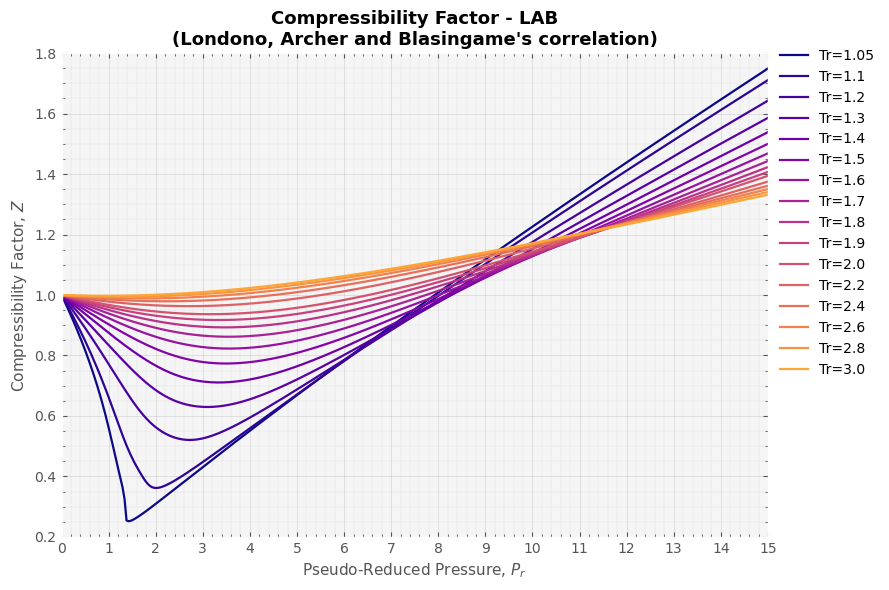

In [21]:
# Parámetros para el gráfico
Pr_min, Pr_max = 0.001, 15
Pr_val = np.linspace(Pr_min, Pr_max, 360)
Tr_val = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Encontrar raíces para cada valor de Tr_val
roots_by_Tr = find_roots(Tr_val, Pr_val, zmodel_LAB)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Obtener una paleta de colores
colors = plt.cm.plasma(np.linspace(0, 0.8, len(Tr_val)))

# Graficar el factor de compresibilidad - Correlación de DAK
for i, (Tr, roots) in enumerate(roots_by_Tr.items()):
    ax.plot(Pr_val, roots, label=f'Tr={Tr}', color=colors[i], linewidth=1.6)

# Personalización de los ejes
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=11)
ax.set_ylabel('Compressibility Factor, $Z$', fontsize=11)
ax.set_xlim(0, 15)
ax.set_ylim(0.2, 1.8)

# Configuración de la cuadrícula y los ticks
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.2))

ax.grid(which='major', color='k', linestyle='-', linewidth=0.6, alpha=0.1)
ax.grid(which='minor', color='k', linestyle='-', linewidth=0.3, alpha=0.1)

# Ajuste de los ticks
ax.tick_params(which='both', direction='in', top=True, right=True)

# Leyenda fuera del gráfico a la derecha sin borde
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.67), frameon=False)

# Agregar un título al gráfico
ax.set_title("Compressibility Factor - LAB\n(Londono, Archer and Blasingame's correlation)", fontsize=13, fontweight='bold')

# Aplicar color de fondo
ax.set_facecolor('0.96') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()